In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [3]:
train_identity = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')


In [4]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [6]:
train_identity.shape

(144233, 41)

In [7]:
#Percentage of missing values in each column
(np.sum(pd.isnull(train_transaction)).sort_values(ascending=False)/len(train_transaction))*100


dist2            93.628374
D7               93.409930
D13              89.509263
D14              89.469469
D12              89.041047
                   ...    
C11               0.000000
C12               0.000000
C13               0.000000
C14               0.000000
TransactionID     0.000000
Length: 394, dtype: float64

In [8]:
train_transaction_identity = train_transaction.merge(train_identity, on='TransactionID',how='left' )


In [9]:
train_transaction_identity.shape

(590540, 434)

In [10]:
train_transaction_identity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [11]:
#columns with different types

obj_col = train_transaction_identity.select_dtypes(include='O').columns
float_col = train_transaction_identity.select_dtypes(include='float64').columns
int_col = train_transaction_identity.select_dtypes(include='int64').columns

In [12]:
train_transaction_identity[float_col] = train_transaction_identity[float_col].astype('float32')

In [13]:
train_transaction_identity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float32(399), int64(4), object(31)
memory usage: 1.0+ GB


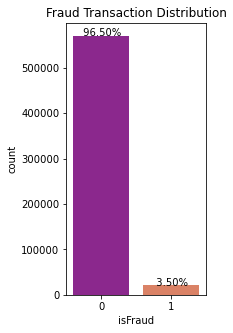

In [14]:
plt.figure(figsize=(2.5,5))
plt.title("Fraud Transaction Distribution")
p1 = sns.countplot(train_transaction_identity['isFraud'], palette = 'plasma')

for p in p1.patches:
        p1.annotate('{:6.2f}%'.format(p.get_height()/len(train_transaction_identity)*100), (p.get_x()+0.1, p.get_height()+50))
        
plt.show()

In [15]:
(np.sum(pd.isnull(train_transaction_identity)).sort_values(ascending=False)/len(train_transaction_identity))*100


id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
                   ...    
C11               0.000000
C12               0.000000
C13               0.000000
C14               0.000000
TransactionID     0.000000
Length: 434, dtype: float64

In [16]:
#Remove variables with missing values more than 30 percent

A = (np.sum(pd.isnull(train_transaction_identity)).sort_values(ascending=False)/len(train_transaction_identity))*100
Removed_col = A[A>0.3].index
train_transaction_identity.drop(columns=Removed_col, inplace=True)


In [17]:
train_transaction_identity.shape

(590540, 110)

In [18]:
#Change Categorical Variables to dummies
train_dummy = pd.get_dummies(train_transaction_identity, drop_first=True)

In [19]:
train_dummy.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
0,2987000,0,86400,68.5,13926,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,1,0,0,1,0,0
1,2987001,0,86401,29.0,2755,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,0
2,2987002,0,86469,59.0,4663,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,2987003,0,86499,50.0,18132,150.0,2.0,5.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0
4,2987004,0,86506,50.0,4497,150.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0


In [20]:
#Remove redundant variables
train_dummy.drop(columns = 'TransactionID', inplace = True)

In [21]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(
    train_dummy.drop(columns='isFraud'), train_dummy['isFraud'], test_size=0.25, random_state=0)



params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          'is_unbalance':True,

         }

d_train = lgb.Dataset(X_train, y_train)
d_valid = lgb.Dataset(X_valid, y_valid)
    
bst = lgb.train(params, d_train, num_boost_round= 300, valid_sets=[d_train, d_valid], verbose_eval=50, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.954433	valid_1's auc: 0.921943
[100]	training's auc: 0.963611	valid_1's auc: 0.92899
[150]	training's auc: 0.971097	valid_1's auc: 0.935476
[200]	training's auc: 0.976265	valid_1's auc: 0.94009
[250]	training's auc: 0.980931	valid_1's auc: 0.94326
[300]	training's auc: 0.984007	valid_1's auc: 0.94525
Did not meet early stopping. Best iteration is:
[300]	training's auc: 0.984007	valid_1's auc: 0.94525
CPU times: user 5min 10s, sys: 4.74 s, total: 5min 14s
Wall time: 1min 21s
